# 8.2 Artificial Neural Network

### 1. 입력방향에 따른 구분

##### FFNN(Feed-Forward Neural Network)
입력력에서 출력층 방향으로 연산이 전개되는 신경망

##### RNN(Recurrrent Neural Network)
은닉층의 출력값이 다시 은닉층의 입력으로 사용되는 신경망


### 2. 전결합층(Fully-connected layer, FC, Dense layer)
앞서 본 다층 퍼셉트론은 은닉층과 출력층에 있는 모든 뉴런은 바로 이전 층의 모든 뉴런과 연결돼 있었습니다. 그와 같이 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결돼 있는 층을 전결합층이라고 합니다. 줄여서 FC라고 부르기도 합니다.

즉, 앞서 본 다층 퍼셉트론의 모든 은닉층과 출력층은 전결합층입니다. 이와 동일한 의미로 밀집층(Dense layer)이라고 부르기도 하는데, 케라스에서는 밀집층을 구현할 때 Dense()를 사용합니다.

만약 전결합층만으로 구성된 피드 포워드 신경망이 있다면, 이를 전결합 피드 포워드 신경망(Fully-connected FFNN)이라고도 합니다.

### 3. 활성화함수(Activation Function)

##### 1) 활성화 함수의 특징-비선형함수(Nonlinear function)
활성화 함수의 특징은 선형 함수가 아닌 **비선형 함수**여야 한다는 점입니다. 
- 선형 함수란 출력이 입력의 상수배만큼 변하는 함수를 선형함수라고 합니다. 
- 예를 들어 $f(x)=Wx+b$라는 함수가 있을 때, W와 b는 상수입니다. 이 식은 그래프를 그리면 직선이 그려집니다. 
- 반대로 비선형 함수는 직선 1개로는 그릴 수 없는 함수를 말합니다.

인공 신경망에서 활성화 함수는 반드시 비선형 함수여야 합니다. 앞서 퍼셉트론에서도 계단 함수라는 활성화 함수를 사용했습니다. 즉, 계단 함수 또한 비선형 함수에 속합니다.

인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 합니다. 그런데 만약 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없습니다. 

예를 들어 활성화 함수로 선형 함수를 선택하고, 층을 계속 쌓는다고 가정해보겠습니다. 
- 활성화 함수는 $f(x)=Wx$라고 가정합니다. 
- 여기다가 은닉층을 두 개 추가한다고하면 출력층을 포함해서 $y(x)=f(f(f(x)))$가 됩니다. 
- 이를 식으로 표현하면 $W×W×W×x$입니다. 
- 그런데 이는 잘 생각해보면 W의 세 제곱값을 k라고 정의해버리면 $y(x)=kx$와 같이 다시 표현이 가능합니다. 

즉, 선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없습니다.

선형 함수를 사용한 은닉층을 1회 추가한 것과 연속으로 추가한 것이 차이가 없다는 뜻이지, 선형 함수를 사용한 층이 아무 의미가 없다는 뜻이 아닙니다. 학습 가능한 가중치가 새로 생긴다는 점에서 분명히 의미가 있습니다. 

이와 같이 선형 함수를 사용한 층을 활성화 함수를 사용하는 은닉층과 구분하기 위해서 **선형층(linear layer)이나 투사층(projection layer)** 등의 다른 표현을 사용하여 표현하기도 합니다. 활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층(nonlinear layer)입니다.

##### 2) 활성화 함수 종류
- Step Function
- sigmoid function
- Hyperbolic tangent function
- ReLU function
- Leaky ReLU
- Softmax

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

##### 3) 계단함수(Step function)

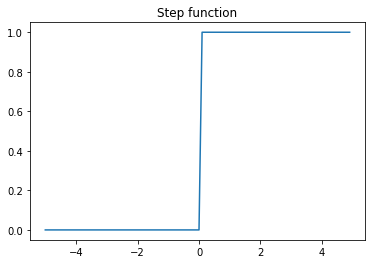

In [10]:
def step(x):
    '''
    np.array(x>0, dtype=np.int)
    입력값 x를 평가하여 
       True( x>0 )이면 1을 return
       False( x<=0)이면 0을 return
    dtype=np.int가 true,false를 정수형(0,1)로 형변환
    '''
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step(x)

plt.title('Step function')
plt.plot(x,y)
plt.show()

##### 4) 시스모이드 함수(sigmoid function)와 기울기 소실

인공 신경망의 학습 과정은 다음과 같습니다. 
- 우선 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산을 하고, 
- 그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산하고, 
- 그리고 이 손실(loss)을 미분을 통해서 기울기(gradient)를 구하고, 
- 이를 통해 역전파(back propagation)를 수행합니다.

그리고 시그모이드 함수의 문제점은 미분을 해서 기울기(gradient)를 구할 때 발생합니다.

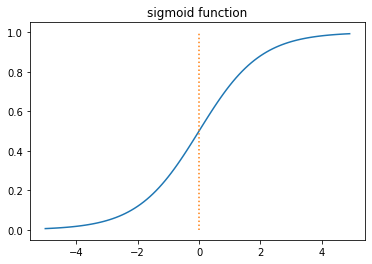

In [35]:
def sigmoid(x):
    return  1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[0.0,1.0],":")
plt.title('sigmoid function')
plt.show()

위의 그래프는 시그모이드 함수의 그래프를 보여줍니다. 위 그래프를 시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해지는 모습을 볼 수 있습니다. 기울기가 완만해지는 구간을 주황색, 그렇지 않은 구간을 초록색으로 칠해보겠습니다.

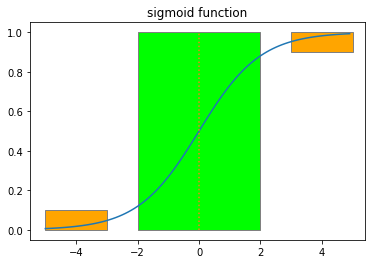

In [38]:
plt.plot(x,y)
plt.plot([0,0],[0.0,1.0],":")
plt.title('sigmoid function')

rectangle = plt.Rectangle((-2,0),4,1, fc='lime', ec='gray')
plt.gca().add_patch(rectangle)

rectangle = plt.Rectangle((-5,0),2,0.1, fc='orange', ec='gray')
plt.gca().add_patch(rectangle)

rectangle = plt.Rectangle((3,0.9),2,0.1, fc='orange', ec='gray')
plt.gca().add_patch(rectangle)

plt.show()

주황색 부분은 기울기를 계산하면 0에 가까운 아주 작은 값이 나오게 됩니다. 그런데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 됩니다. 이러한 현상을 **기울기 소실(Vanishing Gradient) 문제**라고 합니다.

시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 됩니다. 다시 말해 매개변수 W가 업데이트 되지 않아 학습이 되지를 않습니다.

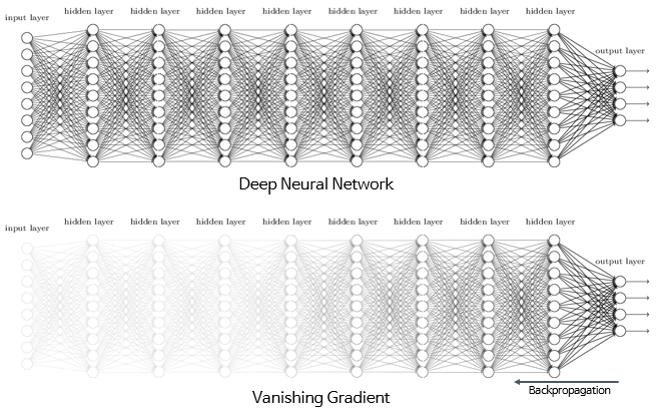

위의 그림은 은닉층이 깊은 신경망에서 기울기 소실 문제로 인해 출력층과 가까운 은닉층에서는 기울기가 잘 전파되지만, 앞단으로 갈수록 기울기가 제대로 전파되지 않는 모습을 보여줍니다. 결론적으로 시그모이드 함수를 은닉층에서 사용하는 것은 지양됩니다.

##### 5) 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)
하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환합니다. 그래프를 그려보겠습니다.

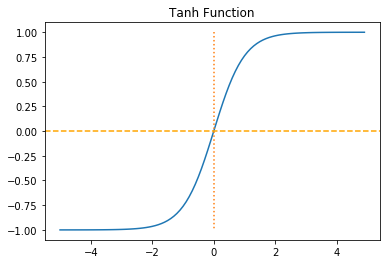

In [43]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

하이퍼볼릭탄젠트 함수도 
- -1과 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제가 발생합니다. 
- 그러나 하이퍼볼릭탄젠트 함수의 경우에는 시그모이드 함수와는 달리 0을 중심으로 하고 있는데, 이때문에 시그모이드 함수와 비교하면 반환값의 변화폭이 더 큽니다. 
- 그래서 시그모이드 함수보다는 기울기 소실 증상이 적은 편입니다. 

그래서 은닉층에서 시그모이드 함수보다는 많이 사용됩니다.

##### 6) 렐루 함수(ReLU)
인공 신경망에서 가장 최고의 인기를 얻고 있는 함수입니다. 수식은 $f(x)=max(0,x)$로 아주 간단합니다.

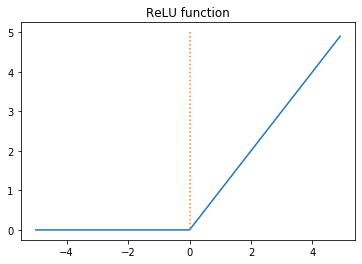

In [45]:
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0,5.0,0.1)
y = relu(x)

plt.plot(x,y)
plt.plot([0,0], [5.0, 0.0], ':')
plt.title('ReLU function')
plt.show()

렐루 함수는 
- 음수를 입력하면 0을 출력하고, 
- 양수를 입력하면 입력값을 그대로 반환합니다. 

렐루 함수는 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동합니다. 뿐만 아니라, 렐루 함수는 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠릅니다.

하지만 여전히 문제점이 존재하는데, 입력값이 음수면 기울기도 0이 됩니다. 

그리고 이 뉴런은 다시 회생하는 것이 매우 어렵습니다. 이 문제를 **죽은 렐루(dying ReLU)**라고 합니다.

##### 7) 리키 렐루(Leaky ReLU)
죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했습니다. 변형 함수는 여러 개가 있지만 여기서는 Leaky ReLU에 대해서만 소개합니다. 

Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있습니다.

수식은 $f(x)=max(ax,x)$로 아주 간단합니다. 
- a는 하이퍼파라미터로 Leaky('새는') 정도를 결정하며 일반적으로는 0.01의 값을 가집니다. 
- 여기서 말하는 '새는 정도'라는 것은 입력값의 음수일 때의 기울기를 비유하고 있습니다.

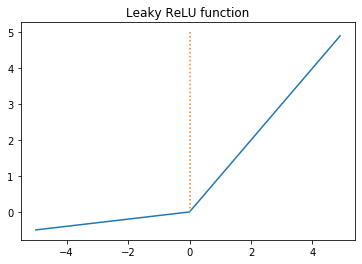

In [46]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x,x)

x = np.arange(-5.0,5.0,0.1)
y = leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0],':')
plt.title('Leaky ReLU function')
plt.show()

위의 그래프에서는 새는 모습을 확실히 보여주기 위해 a를 0.1로 잡았습니다. 위와 같이 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지 않습니다.

##### 8) 소프트맥스 함수(Softamx function)
은닉층에서 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적이지만 그렇다고 해서 앞서 배운 시그모이드 함수나 소프트맥스 함수가 사용되지 않는다는 의미는 아닙니다. 분류 문제를 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용하여 사용합니다.

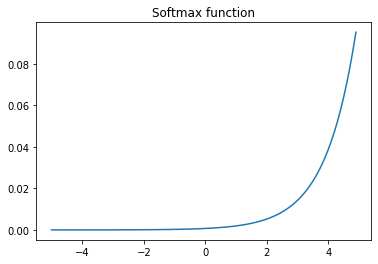

In [48]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x)/np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax function')
plt.show()

소프트맥스 함수는 시그모이드 함수처럼 출력층의 뉴런에서 주로 사용되는데, 
- 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면 
- 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용됩니다.

### 4. 행렬의 곱셈을 이용한 순전파(Forward Propagation)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

아직 케라스로 인공 신경망 모델을 만드는 방법을 자세히 배우지 않았지만, 사실 위의 코드가 어떤 의미인지 파악하는 것은 어렵지 않습니다. 위의 코드의 주석에서 () 괄호 안의 값은 각 층에서의 뉴런의 수를 의미하며 입력층부터 출력층까지 순차적으로 인공 신경망의 층을 한 층씩 추가하였습니다. 케라스를 사용하면 이렇게 간단하게 딥 러닝 모델을 구현할 수 있습니다.

인공 신경망에서 입력층에서 출력층 방향으로 연산을 진행하는 과정을 순전파(Forward Propagation)라고 합니다. 다르게 말하면 주어진 입력으로부터 예측값을 계산하는 과정을 순전파라고 합니다. 앞서 머신 러닝 챕터에서 배웠던 벡터와 행렬 연산을 인공 신경망에 적용하려고 하면, 벡터와 행렬 연산이 순전파 과정에서 층(layer)마다 적용이 됩니다.

사실 케라스로 인공 신경망을 만들면 이러한 연산 과정을 자세히 이해하지 않아도 모델을 만들 수는 있지만, Numpy 등을 통해 인공 신경망을 로우 레벨로 개발하고 있다면 인공 신경망 내부 연산에 사용하는 행렬 크기를 고려해야 인공 신경망을 구현할 수 있습니다. 그렇기 때문에 비록 이 책은 케라스를 사용하지만, 적어도 로우 레벨 단계에서는 행렬의 크기가 어떻게 결정되는지 이해해보고자 합니다.

##### 1) layer 1의 행렬 크기 추정하기
우선 각 층을 기준으로 입력과 출력의 개수를 정리하면 다음과 같습니다.

입력층 : 4개의 입력과 8개의 출력  
은닉층1 : 8개의 입력과 8개의 출력  
은닉층2 : 8개의 입력과 3개의 출력  
출력층 : 3개의 입력과 3개의 출력  

여기서는 편의상 입력층을 layer 0, 은닉층 1을 layer 1, 은닉층 2를 layer 2, 출력층을 layer 3라고 해봅시다. 
- 이제 위의 정보를 가지고 층마다 생기는 가중치와 편향 행렬의 크기를 추정해봅시다. 
- 벡터와 행렬 연산 챕터에서 언급하였듯이 가중치 행렬에 입력 행렬을 곱하는 경우와 입력 행렬에 가중치 행렬을 곱하는 경우가 있겠으나, 여기서는 후자를 가정합니다. 
- 또한 배치 크기는 1로 합니다. 
- 이 경우 layer 1에서 처음 입력으로 들어오는 입력 행렬 X의 크기는 1 × 4로 행벡터에 해당됩니다. (만약 미니 배치 학습을 가정할 경우, X의 크기는 배치의 크기 × 4가 됩니다.)

앞서 벡터와 행렬 연산 챕터에서 배운 바에 따르면, 입력 행렬, 가중치 행렬, 편향 행렬, 출력 행렬은 다음과 같은 크기 관계를 가집니다.

$X_{m × n}×W_{n × j}+B_{m × j}=Y_{m × j}$

layer 1의 입력 행렬 X 의 크기는 1 × 4입니다. layer 1의 출력은 8개이므로, 그에 따라 출력 행렬 Y의 크기는 1 × 8이 됩니다.

$X_{1 × 4}×W_{n × j}+B_{m × j}=Y_{1 × 8}$

그런데 가중치 행렬 W의 행은 입력 행렬 X의 열과 같아야 하므로 아래와 같습니다.

$X_{1 × 4}×W_{4 × j}+B_{m × j}=Y_{1 × 8}$

편향 행렬 B는 출력 행렬 Y의 크기에 영향을 주지 않으므로 편향 행렬 B의 크기는 출력 행렬 Y의 크기와 같습니다.

$X_{1 × 4}×W_{4 × j}+B_{1 × 8}=Y_{1 × 8}$

가중치 행렬 W의 열은 출력 행렬 Y의 열과 동일해야 합니다.

$X_{1 × 4}×W_{4 × 8}+B_{1 × 8}=Y_{1 × 8}$

layer 1의 가중치 행렬과 편향 행렬의 크기를 구했습니다. 이제 layer 1의 출력 행렬 Y는 layer 2에서는 입력 행렬 X가 됩니다.

##### 2) layer 2와 layer 3의 행렬 크기 추정하기
이를 반복하면 layer 2와 layer 3에서의 가중치 행렬과 편향 행렬의 크기를 구할 수 있습니다. 비록 은닉층과 출력층에 활성화 함수가 존재하지만 활성화 함수는 행렬의 크기에 영향을 주지 않습니다.

layer 2 : $X_{1 × 8}×W_{8 × 8}+B_{1 × 8}=Y_{1 × 8}$  
layer 3 : $X_{1 × 8}×W_{8 × 3}+B_{1 × 3}=Y_{1 × 3}$

인공 신경망이 입력층에서 은닉층을 지나 출력층에서 예측값을 계산하기까지의 과정을 행렬 연산으로 가정하고 행렬의 크기를 추정해보았습니다. 

- 이와 같이 순전파를 진행하고 예측값을 구하고나서 
- 이 다음에 인공 신경망이 해야할 일은 예측값과 실제값으로부터 오차를 계산하고, 
- 오차로부터 가중치와 편향을 업데이트하는 일입니다. 

즉, 인공 신경망의 학습 단계에 해당됩니다. 이때 인공 신경망은 순전파와는 반대 방향으로 연산을 진행하며 가중치를 업데이트하는데, 이 과정을 역전파(BackPropagation)라고 합니다. 인공 신경망의 이러한 학습 방법에 대해서는 다음 챕터에서 배웁니다.